# ResNet50 on MURA

Directly using ResNet50 from Keras: https://keras.io/applications/#resnet50

In [1]:
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.utils import np_utils
from keras.utils import to_categorical
%load_ext autotime

Using TensorFlow backend.


## Loading Data

Loading MURA images

In [2]:
import utils # importing from our utils functions

time: 3.61 s


In [3]:
x_train, y_train, x_test, y_test = utils.read_mura_pickle()

INFO:utils.utils:loading data/MURA-v1.1/x_train.pkl
INFO:utils.utils:loading data/MURA-v1.1/y_train.pkl
INFO:utils.utils:loading data/MURA-v1.1/x_valid.pkl
INFO:utils.utils:loading data/MURA-v1.1/y_valid.pkl


time: 2.19 s


We can look at the shape of the dataset:

In [4]:
x_train.shape

(36808, 256, 256)

time: 3.36 ms


In [5]:
size = x_train.shape[1]

time: 4.32 ms


Visually inspect an image:

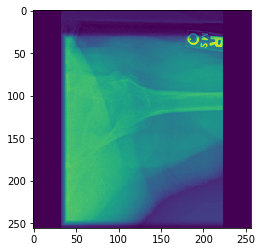

time: 250 ms


In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])

## Data preparation

reshape the data from $512\times512$ to $512\times512\times1$  (1 for channel)

In [7]:
x_train = x_train.reshape(x_train.shape[0], size, size, 1)
x_test = x_test.reshape(x_test.shape[0], size, size, 1)

time: 1.2 ms


In [8]:
x_train.shape

(36808, 256, 256, 1)

time: 3.14 ms


Convert our data type to float32 and normalize our data values to the range [0, 1].

In [9]:
x_train = utils.normalize_pixels(x_train)
x_test = utils.normalize_pixels(x_test)

time: 4.1 s


even though we have a 0-1 target, it's easier if we frame it in terms of a 2-class classification task.

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

time: 1.58 ms


In [11]:
y_train.shape

(36808, 2)

time: 6.87 ms


## Define model architecture

In [12]:
# declare sequential model
model = ResNet50(input_shape=(256, 256, 1), weights=None, classes=2)

time: 4.88 s


In [13]:
model.output_shape

(None, 2)

time: 1.54 ms


## Compile model

We still need to define the loss and optimization method. Keras has a variety of [loss functions](https://keras.io/losses/) and out-of-the-box [optimizers](https://keras.io/optimizers/) to choose from. For this tutorial we'll use cross-entropy as loss function and [Adam](https://arxiv.org/abs/1412.6980) as our optimizer.

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

time: 33.3 ms


## Fitting the model

In [16]:
model.fit(x_train, y_train, 
          batch_size=32, epochs=100, verbose=2)

Epoch 1/100
 - 507s - loss: 0.7696 - acc: 0.5818
Epoch 2/100
 - 500s - loss: 0.6592 - acc: 0.6043
Epoch 3/100
 - 506s - loss: 0.6511 - acc: 0.6186
Epoch 4/100
 - 516s - loss: 0.6428 - acc: 0.6265
Epoch 5/100
 - 535s - loss: 0.6298 - acc: 0.6450
Epoch 6/100
 - 529s - loss: 0.6097 - acc: 0.6665
Epoch 7/100
 - 507s - loss: 0.5905 - acc: 0.6865
Epoch 8/100
 - 518s - loss: 0.5778 - acc: 0.7020
Epoch 9/100
 - 527s - loss: 0.5650 - acc: 0.7113
Epoch 10/100
 - 532s - loss: 0.5529 - acc: 0.7207
Epoch 11/100
 - 542s - loss: 0.5490 - acc: 0.7229
Epoch 12/100
 - 549s - loss: 0.5324 - acc: 0.7395
Epoch 13/100
 - 537s - loss: 0.5255 - acc: 0.7410
Epoch 14/100
 - 518s - loss: 0.5150 - acc: 0.7504
Epoch 15/100
 - 520s - loss: 0.5066 - acc: 0.7571
Epoch 16/100
 - 507s - loss: 0.4955 - acc: 0.7631
Epoch 17/100
 - 509s - loss: 0.4833 - acc: 0.7710
Epoch 18/100
 - 520s - loss: 0.4738 - acc: 0.7781
Epoch 19/100
 - 538s - loss: 0.4610 - acc: 0.7862
Epoch 20/100
 - 560s - loss: 0.4465 - acc: 0.7958
Epoch 21/

time: 14h 26min 29s


In [26]:
model.save('./trained_models/1_1_resnet50_mura.h5')

time: 2.84 s


We can check how loss and accuracy change over epochs

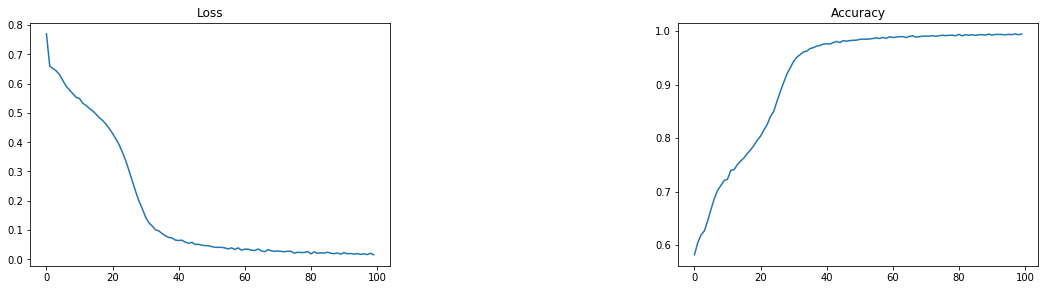

time: 205 ms


In [18]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(model.history.history['loss'])
plt.title('Loss')
plt.subplot(122)
plt.plot(model.history.history['acc'])
plt.title('Accuracy')
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.show()

## Evaluating our model on the test set

### Loss and Accuracy

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)

time: 14 s


In [28]:
score

[1.950570273854265, 0.6997184859501931]

time: 5.19 ms


In [29]:
# compute predicted y
y_test_hat = model.predict(x_test)

time: 14 s


In [30]:
# get actual digit labels
true_label = np.argmax(y_test, axis=1)
pred_label = np.argmax(y_test_hat, axis=1)

time: 2.29 ms


### Cohen's Kappa

In [31]:
p_observed = (true_label == pred_label).sum()/true_label.shape[0]
p_expected = sum([(true_label == i).sum() * (pred_label == i).sum() / (true_label.shape[0] ** 2) for i in range(10)])

time: 4.32 ms


In [32]:
kappa = (p_observed - p_expected) / (1 - p_expected)

time: 1.33 ms


In [33]:
kappa

0.3924250300806149

time: 12.7 ms
